In [3]:
import pandas as pd

**Part 1**

In [4]:
df = pd.read_csv('cleveland_heart_attr.csv')

In [5]:
print('number of rows are ',df.shape[0])
print('number of columns are ',df.shape[1])

number of rows are  303
number of columns are  14


In [6]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'rest_bp', 'serum_cholesterol',
       'fastblood_sugar', 'rest_ecg', 'max_heartrate', 'exercise_angina',
       'ST_depression_exercise_relativeto_rest', 'slope_peak_STsegment',
       'num_major_vessels_fluroscopy', 'thal', 'heart_disease_status'],
      dtype='object')

**Part 2**

In [7]:
df['num_major_vessels_fluroscopy']

0      0.0
1      3.0
2      2.0
3      0.0
4      0.0
      ... 
298    0.0
299    2.0
300    1.0
301    1.0
302      ?
Name: num_major_vessels_fluroscopy, Length: 303, dtype: object

In [8]:
df['thal'][80:90]

80    3.0
81    3.0
82    3.0
83    7.0
84    3.0
85    3.0
86    3.0
87      ?
88    3.0
89    3.0
Name: thal, dtype: object

Due to the presence of '?'.

**Part 3**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7feb5878d0>]],
      dtype=object)

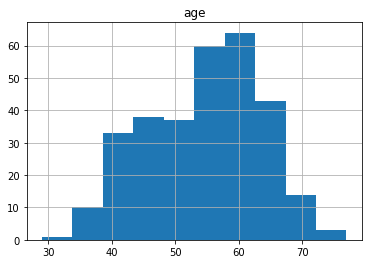

In [9]:
df.hist(column='age')

In [10]:
df['age'].describe()

count    303.000000
mean      54.438944
std        9.038662
min       29.000000
25%       48.000000
50%       56.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

No. of bins = 10

Bin size = (77-29)/10 = 4.8

**Part 4**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7fe52a2210>]],
      dtype=object)

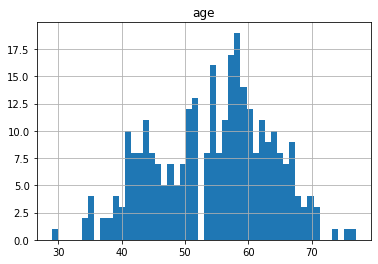

In [11]:
df.hist(column='age',bins=50)

Bin size = (77-29)/50 = 0.96



As we have increased the bin sizes the value corresponding to the bars decreases. because the number of elements of age decreases due to decrease in bin size.

**Part 5**

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

**Part 6**

In [12]:
df['serum_cholesterol'].describe()

count    303.000000
mean     246.693069
std       51.776918
min      126.000000
25%      211.000000
50%      241.000000
75%      275.000000
max      564.000000
Name: serum_cholesterol, dtype: float64

In [13]:
import seaborn as sns 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7fd6b2a290>]],
      dtype=object)

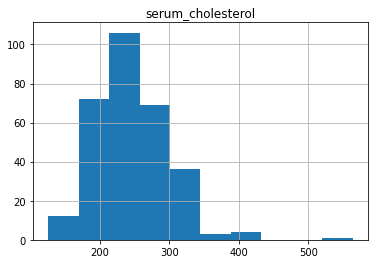

In [14]:
df.hist(column='serum_cholesterol')

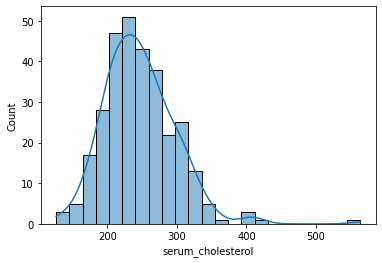

In [15]:
sns.histplot(df.serum_cholesterol,kde=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7fd3f0b3d0>]],
      dtype=object)

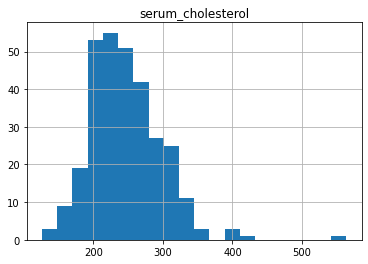

In [16]:
df.hist(column='serum_cholesterol',bins=20)

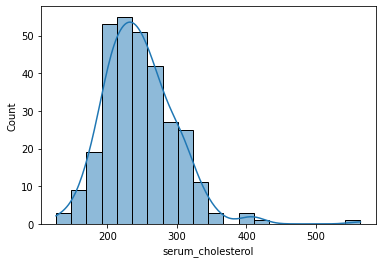

In [17]:
sns.histplot(df.serum_cholesterol,bins=20,kde=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7fd3dc1450>]],
      dtype=object)

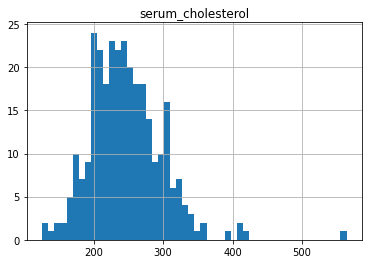

In [18]:
df.hist(column='serum_cholesterol',bins=50)

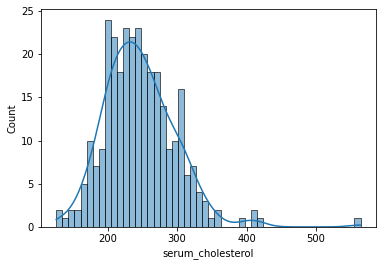

In [19]:
sns.histplot(df.serum_cholesterol,bins=50,kde=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7fd3bbe790>]],
      dtype=object)

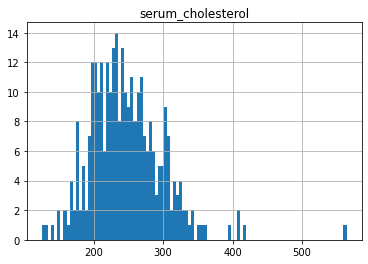

In [20]:
df.hist(column='serum_cholesterol',bins=100)

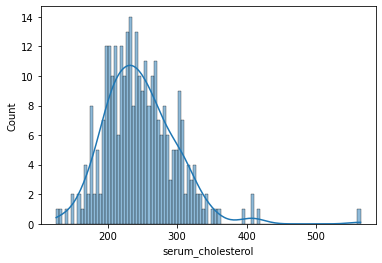

In [21]:
sns.histplot(df.serum_cholesterol,bins=100,kde=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7fd38ad690>]],
      dtype=object)

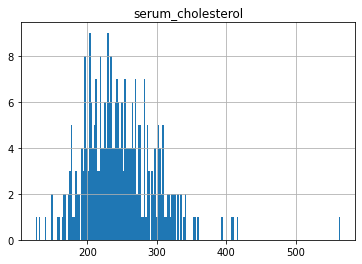

In [22]:
df.hist(column='serum_cholesterol',bins=200)

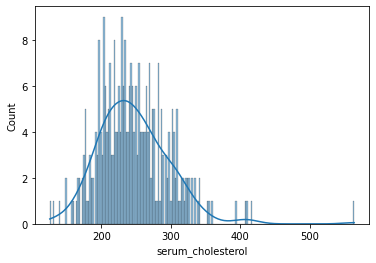

In [23]:
sns.histplot(df.serum_cholesterol,bins=200,kde=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7fd38ca5d0>]],
      dtype=object)

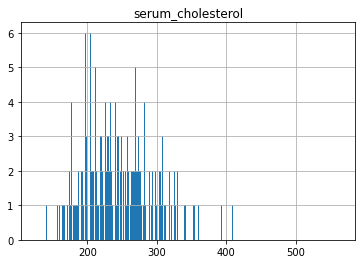

In [24]:
df.hist(column='serum_cholesterol',bins=500)

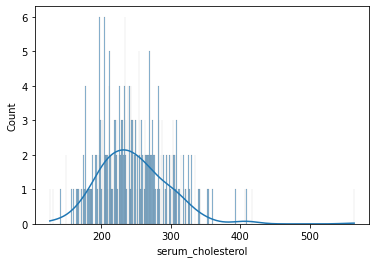

In [25]:
sns.histplot(df.serum_cholesterol,bins=500,kde=True)

increase in number of bins decreases the bin size hence decreases the count value of bars. However the shape of kde curve remains same but its peak value gets decreased.

**Part 7**

In [26]:
df['serum_cholesterol'].describe()

count    303.000000
mean     246.693069
std       51.776918
min      126.000000
25%      211.000000
50%      241.000000
75%      275.000000
max      564.000000
Name: serum_cholesterol, dtype: float64

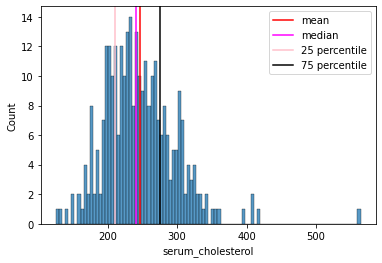

In [27]:
import matplotlib.pyplot as plt
import numpy as np
sns.histplot(df.serum_cholesterol, bins=100)
plt.axvline(x=np.mean(df.serum_cholesterol),color='red',label='mean')
plt.axvline(x=np.median(df.serum_cholesterol),color='magenta',label='median')
plt.axvline(x=211,color='pink',label='25 percentile')
plt.axvline(x=275,color='black',label='75 percentile')
plt.legend(loc='upper right')

**Part 8**

In [28]:
df['gender'] = np.where(df['sex']==1.0,'male','female')

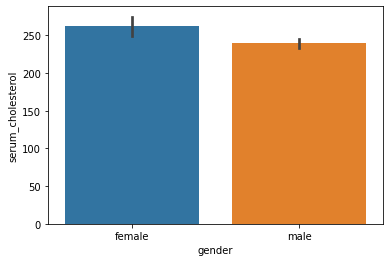

In [29]:
sns.barplot(x="gender",y="serum_cholesterol",data=df, order=['female', 'male'])

**Part 9**

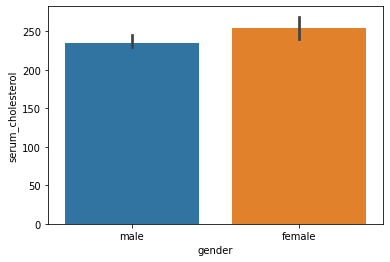

In [30]:
sns.barplot(x="gender",y="serum_cholesterol",data=df,estimator=np.median)

The only change is in the size and position of error bar for male as median is used as estimator

**Part 10**

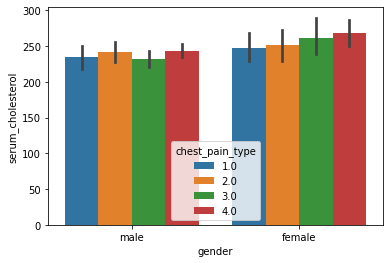

In [31]:
sns.barplot(x="gender",y="serum_cholesterol",hue="chest_pain_type",data=df)

Females with chest_pain_type 4 are likely to have more serum_cholesterol level while male with type 3 have less chance. Also females are likely to have more serum_cholesterol level than male.

**Part 11**

In [32]:
df['chest_pain_type_description'] = np.where(df['chest_pain_type']==1,'a','b')

In [33]:
for i in range(len(df['chest_pain_type'])):
  if df['chest_pain_type'][i]==1:
    df['chest_pain_type_description'][i] = 'typical_angina'
  elif df['chest_pain_type'][i]==2:
    df['chest_pain_type_description'][i] = 'atypical_anginae'
  elif df['chest_pain_type'][i]==3:
    df['chest_pain_type_description'][i] = 'non_anginal_pain'
  else:
    df['chest_pain_type_description'][i] = 'asymptomatic'


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  im

In [34]:
df.head()

,age,sex,chest_pain_type,rest_bp,serum_cholesterol,fastblood_sugar,rest_ecg,max_heartrate,exercise_angina,ST_depression_exercise_relativeto_rest,slope_peak_STsegment,num_major_vessels_fluroscopy,thal,heart_disease_status,gender,chest_pain_type_description
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,male,typical_angina
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,male,asymptomatic
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,male,asymptomatic
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,male,non_anginal_pain
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,female,atypical_anginae


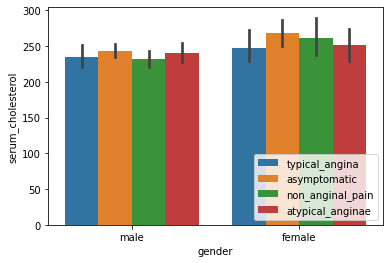

In [35]:
ax = sns.barplot(x="gender",y="serum_cholesterol",hue="chest_pain_type_description",data=df)
ax.legend(loc='lower right', ncol=1)

**Part 12**

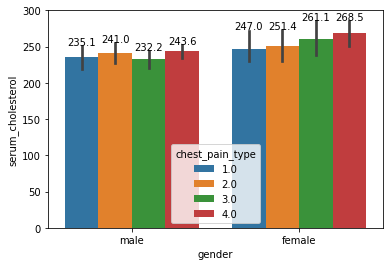

In [36]:
plot = sns.barplot(x="gender",y="serum_cholesterol",hue="chest_pain_type",data=df)
for p,line in zip(plot.patches, plot.lines):
    plot.annotate(format(p.get_height(),'.1f'), 
                   (p.get_x() + p.get_width() / 2., line.get_ydata()[1]), 
                   ha = 'center', va = 'top', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

**Part 13**

Text(1.6000000000000003, 344.73, 'The average serum cholesterol\n for women of chest pain type 4 is maximum')

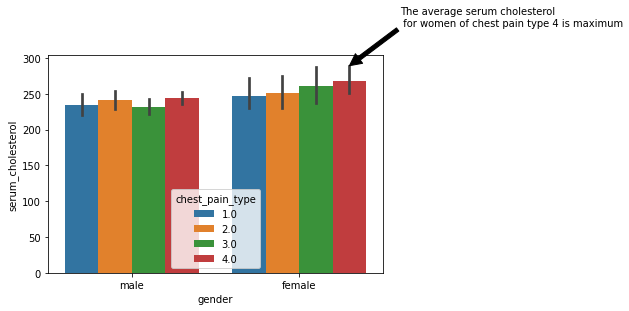

In [37]:
plot1 = sns.barplot(x="gender",y="serum_cholesterol",hue="chest_pain_type",data=df)

x=plot1.patches[7].get_x() + plot1.patches[7].get_width()/2.
y=plot1.lines[7].get_ydata()[1]
plt.annotate('The average serum cholesterol\n for women of chest pain type 4 is maximum', xy=(x,y), xytext=(x+0.3,y+55.5), arrowprops=dict(facecolor='black'))

**Part 14**

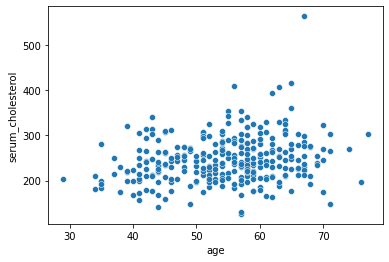

In [38]:
sns.scatterplot(x="age",y="serum_cholesterol",data=df)

we cannot infer much from this plot as the plot is evenly scattered.
one thing i can say is that people between age group of 50-60 are likely to have serum_cholesterol level in between 200 and 300.

**Part 15**

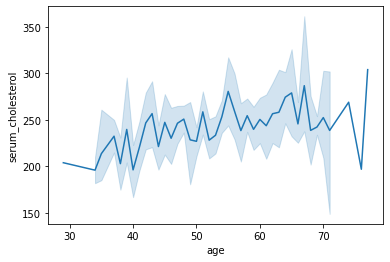

In [39]:
sns.lineplot(x="age",y="serum_cholesterol",data=df)

The dark line denote the mean value of serum_cholesterol and the shaded region denote 95% confidence interval.

**Part 16**

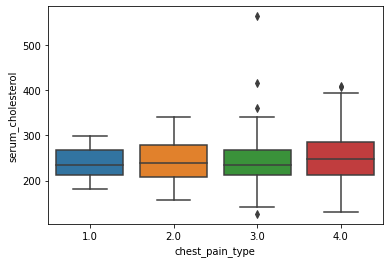

In [40]:
sns.boxplot(x="chest_pain_type",y="serum_cholesterol",data=df)

The line within the boxes represents median, the upper line of boxes represent 75 percentile and lower represent 25 percentile. The points marked beyond the error bars represent the outliers.

**Part 17**

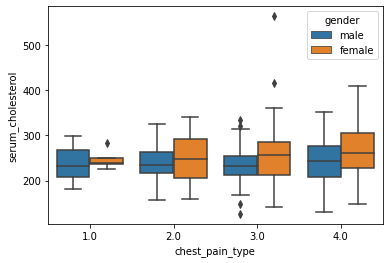

In [41]:
sns.boxplot(x="chest_pain_type",y="serum_cholesterol",hue="gender",data=df)

The median value of serum_cholesterol of females for each chest pain type is greater than that of males.

**Part 18**

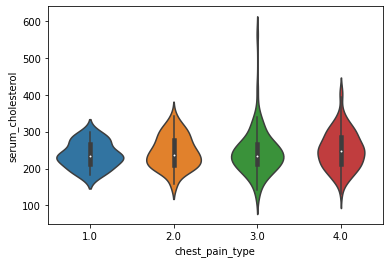

In [42]:
sns.violinplot(x="chest_pain_type",y="serum_cholesterol",data=df)

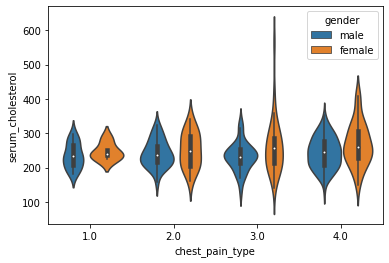

In [43]:
sns.violinplot(x="chest_pain_type",y="serum_cholesterol",hue="gender",data=df)

The serum_cholesterol values of females are greater than that of males.